Задание 2. Вариант 4

Исследование сверточной нейронной сети для классификации полноцветных изображений из БД CIFAR-10

Для БД CIFAR-10 – полноцветных изображений реальных объектов создать архитектуру сверточной НС с наименьшим числом нейронов, достаточных для правильной классификации изображений тестовой выборки на уровне не менее 92%. Обучить НС с контролем эффекта переобучения путем использования выборки валидации.

Вар. 4. Провести анализ качества обучения НС при разных размерах минибатчей. Определить размер мини-батчей для обеспечения быстрого и качественного обучения сети.

In [2]:
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.constraints import maxnorm
from keras.utils import np_utils

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Set random seed for purposes of reproducibility
seed = 21

In [4]:
from keras.datasets import cifar10 # import dataset

# loading in the data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 14s 0us/step


In [5]:
# normalize the inputs from 0-255 to between 0 and 1 by dividing by 255
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train = X_train / 255.0
X_test = X_test / 255.0

In [6]:
X_train[:1]

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [7]:
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
class_num = y_test.shape[1]

In [30]:
model = Sequential()

In [31]:
# сверточный слой (функ. активации - relu)
model.add(Conv2D(32, (3, 3), input_shape=X_train.shape[1:], padding='same'))
model.add(Activation('relu'))

In [32]:
# исключающий слой (20%)
model.add(Dropout(0.2))

In [33]:
# нормализация входных данных
model.add(BatchNormalization())

In [34]:
# еще один сверточный слой с увеличинным размером фильтра
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

In [35]:
# объединяющий слой
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [36]:
# повторим слои

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Conv2D(128, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [37]:
model.add(Flatten())
model.add(Dropout(0.2))

In [38]:
model.add(Dense(256, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(128, kernel_constraint=maxnorm(3)))
model.add(Activation('relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())

In [39]:
# выбирает нейрон с наиб. значением
model.add(Dense(class_num))
model.add(Activation('softmax'))

In [40]:
# оптимизатор
epochs = 25
optimizer = 'adam'

In [41]:
# компиляция модели
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

In [42]:
# сводка по модели
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 activation_7 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 dropout_7 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 batch_normalization_6 (Batc  (None, 32, 32, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 activation_8 (Activation)   (None, 32, 32, 64)        0         
                                                      

Приступим к обучению модели

In [ ]:
numpy.random.seed(seed)
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1, batch_size=1)

50000/50000 [==============================] - 312s 6ms/step - loss: 2.3051 - accuracy: 0.0987 - val_loss: 235.0692 - val_accuracy: 0.0764


In [ ]:
# Model evaluation
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 7.64%


Возьмем batch_size = 10

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=10)

Epoch 1/5
5000/5000 [==============================] - 37s 7ms/step - loss: 0.9197 - accuracy: 0.6883 - val_loss: 0.6725 - val_accuracy: 0.7672
Epoch 2/5
5000/5000 [==============================] - 38s 8ms/step - loss: 0.8745 - accuracy: 0.7026 - val_loss: 0.6993 - val_accuracy: 0.7609
Epoch 3/5
5000/5000 [==============================] - 38s 8ms/step - loss: 0.8710 - accuracy: 0.7048 - val_loss: 0.6469 - val_accuracy: 0.7789
Epoch 4/5
5000/5000 [==============================] - 37s 7ms/step - loss: 0.8644 - accuracy: 0.7092 - val_loss: 0.7854 - val_accuracy: 0.7250
Epoch 5/5
5000/5000 [==============================] - 36s 7ms/step - loss: 0.8701 - accuracy: 0.7051 - val_loss: 0.6515 - val_accuracy: 0.7738


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc1 = scores[1]*100

Accuracy: 77.38%


Попробуем взять значение 30

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=30)

Epoch 1/5
1667/1667 [==============================] - 14s 8ms/step - loss: 0.6293 - accuracy: 0.7850 - val_loss: 0.5585 - val_accuracy: 0.8112
Epoch 2/5
1667/1667 [==============================] - 14s 8ms/step - loss: 0.5942 - accuracy: 0.7948 - val_loss: 0.5359 - val_accuracy: 0.8159
Epoch 3/5
1667/1667 [==============================] - 14s 8ms/step - loss: 0.5907 - accuracy: 0.7968 - val_loss: 0.5591 - val_accuracy: 0.8128
Epoch 4/5
1667/1667 [==============================] - 13s 8ms/step - loss: 0.5834 - accuracy: 0.7985 - val_loss: 0.5263 - val_accuracy: 0.8211
Epoch 5/5
1667/1667 [==============================] - 13s 8ms/step - loss: 0.5722 - accuracy: 0.7998 - val_loss: 0.5392 - val_accuracy: 0.8133


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc2 = scores[1]*100

Accuracy: 81.33%


Возьмем значение 64

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5, batch_size=64)

Epoch 1/5
782/782 [==============================] - 10s 12ms/step - loss: 0.4690 - accuracy: 0.8364 - val_loss: 0.4920 - val_accuracy: 0.8327
Epoch 2/5
782/782 [==============================] - 9s 12ms/step - loss: 0.4379 - accuracy: 0.8469 - val_loss: 0.4994 - val_accuracy: 0.8317
Epoch 3/5
782/782 [==============================] - 9s 12ms/step - loss: 0.4308 - accuracy: 0.8485 - val_loss: 0.5016 - val_accuracy: 0.8279
Epoch 4/5
782/782 [==============================] - 9s 12ms/step - loss: 0.4351 - accuracy: 0.8460 - val_loss: 0.5100 - val_accuracy: 0.8260
Epoch 5/5
782/782 [==============================] - 9s 12ms/step - loss: 0.4296 - accuracy: 0.8485 - val_loss: 0.5021 - val_accuracy: 0.8264


In [ ]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc3 = scores[1]*100

Accuracy: 82.64%


Сравним получившиеся результаты

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
acc = [acc1, acc2, acc3]
num = [10, 30, 64]

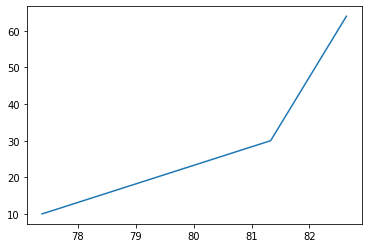

In [ ]:
plt.plot(acc, num)
plt.show()

Достигнем точности в 92%

In [23]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

Epoch 1/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5459 - accuracy: 0.8101 - val_loss: 0.5791 - val_accuracy: 0.8002
Epoch 2/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5273 - accuracy: 0.8165 - val_loss: 0.5950 - val_accuracy: 0.7999
Epoch 3/10
782/782 [==============================] - 9s 12ms/step - loss: 0.5142 - accuracy: 0.8196 - val_loss: 0.5890 - val_accuracy: 0.7965
Epoch 4/10
782/782 [==============================] - 9s 11ms/step - loss: 0.5004 - accuracy: 0.8231 - val_loss: 0.5242 - val_accuracy: 0.8187
Epoch 5/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4909 - accuracy: 0.8293 - val_loss: 0.5738 - val_accuracy: 0.8042
Epoch 6/10
782/782 [==============================] - 9s 11ms/step - loss: 0.4738 - accuracy: 0.8356 - val_loss: 0.5421 - val_accuracy: 0.8159
Epoch 7/10
782/782 [==============================] - 9s 12ms/step - loss: 0.4695 - accuracy: 0.8363 - val_loss: 0.5462 - val_accuracy: 0.8079

In [24]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc4 = scores[1]*100

Accuracy: 80.61%


Попробуем увеличить количество эпох и бэтчи

In [52]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15, batch_size=80)

Epoch 1/15
625/625 [==============================] - 9s 14ms/step - loss: 0.4065 - accuracy: 0.8567 - val_loss: 0.5444 - val_accuracy: 0.8164
Epoch 2/15
625/625 [==============================] - 8s 13ms/step - loss: 0.4022 - accuracy: 0.8590 - val_loss: 0.5147 - val_accuracy: 0.8250
Epoch 3/15
625/625 [==============================] - 8s 14ms/step - loss: 0.3965 - accuracy: 0.8607 - val_loss: 0.5182 - val_accuracy: 0.8236
Epoch 4/15
625/625 [==============================] - 8s 13ms/step - loss: 0.3850 - accuracy: 0.8645 - val_loss: 0.4968 - val_accuracy: 0.8310
Epoch 5/15
625/625 [==============================] - 8s 13ms/step - loss: 0.3769 - accuracy: 0.8670 - val_loss: 0.5222 - val_accuracy: 0.8249
Epoch 6/15
625/625 [==============================] - 8s 14ms/step - loss: 0.3748 - accuracy: 0.8692 - val_loss: 0.5093 - val_accuracy: 0.8306
Epoch 7/15
625/625 [==============================] - 8s 13ms/step - loss: 0.3695 - accuracy: 0.8730 - val_loss: 0.5428 - val_accuracy: 0.8175

In [53]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc4 = scores[1]*100

Accuracy: 82.84%


Возможно, при последующем увеличении кол-ва эпох и (или) размеров бэтчей, мы сможем получить точность 92%, но скорее всего понадобиться увеличить количество нейронов.

In [54]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20, batch_size=80)

Epoch 1/20
625/625 [==============================] - 9s 14ms/step - loss: 0.3476 - accuracy: 0.8796 - val_loss: 0.5086 - val_accuracy: 0.8387
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3453 - accuracy: 0.8801 - val_loss: 0.5045 - val_accuracy: 0.8311
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3393 - accuracy: 0.8807 - val_loss: 0.5309 - val_accuracy: 0.8264
Epoch 4/20
625/625 [==============================] - 8s 14ms/step - loss: 0.3372 - accuracy: 0.8818 - val_loss: 0.5000 - val_accuracy: 0.8337
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3354 - accuracy: 0.8838 - val_loss: 0.4997 - val_accuracy: 0.8378
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3253 - accuracy: 0.8848 - val_loss: 0.4937 - val_accuracy: 0.8376
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 0.3254 - accuracy: 0.8858 - val_loss: 0.4991 - val_accuracy: 0.8352

In [51]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
acc6 = scores[1]*100

Accuracy: 82.19%


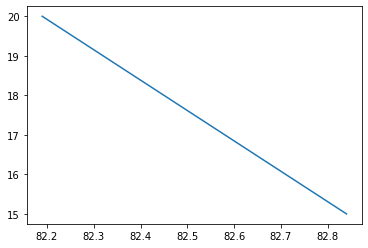

In [57]:
import matplotlib.pyplot as plt
acc123 = [acc4, acc6]
amount = [15, 20]
plt.plot(acc123, amount)
plt.show()